In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
TSLA= pd.read_csv("/content/gdrive/MyDrive/DS 340W/Final Research Paper/Datasets/TSLA_5Y.csv")
TSLA = TSLA.dropna()
TSLA = TSLA[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-23,51.077999,51.534000,50.660000,50.956001,50.956001,16601000
1,2017-03-24,51.139999,52.778000,51.001999,52.632000,52.632000,28236500
2,2017-03-27,52.119999,54.113998,51.950001,54.043999,54.043999,31154000
3,2017-03-28,55.403999,56.136002,55.000000,55.490002,55.490002,39938000
4,2017-03-29,55.667999,55.919998,55.108002,55.476002,55.476002,18381000


In [ ]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,288.330879,294.875868,281.343352,288.483402,288.483402,4.470949e+07
std,325.359074,332.886650,317.101669,325.379827,325.379827,3.009721e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,9.800600e+06
25%,61.377000,62.392000,60.206000,61.506000,61.506000,2.522700e+07
50%,71.250000,72.547997,70.230003,71.136002,71.136002,3.493200e+07
75%,598.415008,609.250000,579.225006,598.365021,598.365021,5.209225e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [ ]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


In [ ]:
pip install chart_studio

     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=0c1c31ae0e77ac583f98ac47370f9770a752dd5d17363c9fd5b82e24eb7adc06
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
layout = go.Layout(
    title='STOCK PRICE OF TSLA',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
TSLA_DATA = [{'x':TSLA['Date'], 'y':TSLA['Close']}]
plot = go.Figure(data=TSLA_DATA, layout=layout)

In [ ]:
iplot(plot)

In [ ]:
TSLA['Open-Close']= TSLA.Close - TSLA.Open
TSLA['High-Low']  = TSLA.High - TSLA.Low
TSLA = TSLA.dropna()
X= TSLA[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,-0.121998,0.874000
1,1.492001,1.776001
2,1.924000,2.163997
3,0.086003,1.136002
4,-0.191997,0.811996


In [ ]:
Y= np.where(TSLA['Close'].shift(-1)>TSLA['Close'],1,-1)

In [ ]:

split_percentage = 0.8
split = int(split_percentage*len(TSLA))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, Y, cv=10))

In [ ]:
print(scores[0])

[0.52380952 0.51587302 0.5        0.48412698 0.50793651 0.44444444
 0.49206349 0.53174603 0.56349206 0.488     ]


In [ ]:
print(scores[1])

[0.46825397 0.5        0.48412698 0.47619048 0.54761905 0.54761905
 0.45238095 0.48412698 0.5        0.52      ]


In [ ]:
rfc = RandomForestClassifier(n_estimators=16)

In [ ]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.50      0.57      0.53       116
           1       0.58      0.51      0.54       136

    accuracy                           0.54       252
   macro avg       0.54      0.54      0.54       252
weighted avg       0.54      0.54      0.54       252



In [ ]:
print(confusion_matrix(Y_test, rfc_pred))

[[66 50]
 [67 69]]


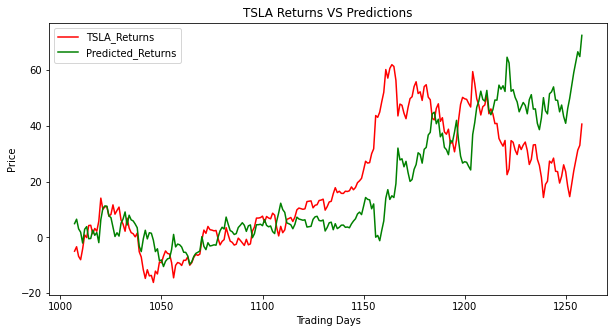

In [ ]:
TSLA['Predicted_Signal'] = rfc.predict(X)

TSLA['TSLA_returns'] = np.log(TSLA['Close']/TSLA['Close'].shift(1))
Cumulative_SPY_returns = TSLA[split:]['TSLA_returns'].cumsum()*100
 
TSLA['Strategy_returns'] = TSLA['TSLA_returns']* TSLA['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = TSLA[split:]['Strategy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'TSLA_Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Predicted_Returns')
plt.legend()
plt.title("TSLA Returns VS Predictions")
plt.xlabel("Trading Days")
plt.ylabel("Price")
plt.show()

In [ ]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: -0.04


In [ ]:
model = rfc.fit(X_train, Y_train)
model = rfc.fit (X_train,Y_train)

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.3125 0.6875]
 [0.875  0.125 ]
 [0.125  0.875 ]
 [0.8125 0.1875]
 [0.0625 0.9375]
 [0.875  0.125 ]
 [0.5    0.5   ]
 [0.4375 0.5625]
 [0.625  0.375 ]
 [0.5    0.5   ]
 [0.625  0.375 ]
 [0.1875 0.8125]
 [0.0625 0.9375]
 [0.8125 0.1875]
 [0.0625 0.9375]
 [0.5625 0.4375]
 [0.1875 0.8125]
 [0.3125 0.6875]
 [1.     0.    ]
 [0.     1.    ]
 [0.1875 0.8125]
 [0.375  0.625 ]
 [0.6875 0.3125]
 [0.875  0.125 ]
 [0.8125 0.1875]
 [0.375  0.625 ]
 [0.5    0.5   ]
 [0.4375 0.5625]
 [0.25   0.75  ]
 [0.5    0.5   ]
 [0.625  0.375 ]
 [0.25   0.75  ]
 [0.5625 0.4375]
 [0.875  0.125 ]
 [0.625  0.375 ]
 [0.4375 0.5625]
 [0.5    0.5   ]
 [0.75   0.25  ]
 [0.75   0.25  ]
 [0.5    0.5   ]
 [0.5    0.5   ]
 [1.     0.    ]
 [0.6875 0.3125]
 [0.4375 0.5625]
 [0.1875 0.8125]
 [0.4375 0.5625]
 [0.9375 0.0625]
 [0.875  0.125 ]
 [0.6875 0.3125]
 [0.9375 0.0625]
 [0.0625 0.9375]
 [0.5    0.5   ]
 [0.     1.    ]
 [0.9375 0.0625]
 [0.1875 0.8125]
 [0.3125 0.6875]
 [0.0625 0.9375]
 [0.3125 0.6875]
 [0.1875 0.812

In [ ]:
predicted = rfc.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.confusion_matrix(Y_test, predicted))

[[67 49]
 [63 73]]


In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.52      0.58      0.54       116
           1       0.60      0.54      0.57       136

    accuracy                           0.56       252
   macro avg       0.56      0.56      0.56       252
weighted avg       0.56      0.56      0.56       252



In [ ]:
#print(model.score(X_train,Y_train))

In [ ]:
print(model.score(X_test,Y_test))

0.5555555555555556
